# Import các thư viện và lấy dữ liệu

In [ ]:
import gdown

# URL của thư mục Google Drive
url = 'https://drive.google.com/drive/folders/14jLblEm6ok35lq_G7JGz16K_Cpo6FTOi?usp=sharing'

# Chuyển đổi URL sang định dạng gdown
gdown.download_folder(url, quiet=False)


Retrieving folder contents


Retrieving folder 1hi7cyxz94kM-aDy01Q9HnMWxRyhThqSL Data keyword
Retrieving folder 1CNv31jN5O_hMEvKbXMGm4oeetG2XcmxN data delete stopword
Processing file 1FhWnxHs3c8LUuP6DJUgA9gvwo2siQOve Data_test_delete_stopword.csv
Processing file 1f8VbfcSvgu82-o6K75WEcLvNWqNlr_JE Data_train_delete_stopword.csv
Processing file 1XakKKsrBFfzPudSd5sMRUZfqmMPFw4u6 Data_valid_delete_stopword.csv
Processing file 1PS4WVpu60ls4Ca3ELXoJJoT0DMSz54Od Data surveys gpt extract.csv
Processing file 1-sY75qwt2HpkAGVZf9BAud7lNc_bJpim data_train.rar
Processing file 1P6ir1ABHGGk0RS-c8-LEjkYiLcuXkY1A test.csv
Processing file 1X2TQihpQ2_XB6cxcqj2WmKY2ck89ygNW train.csv
Processing file 12GcjmDQim5Gz7HaqJHF7NQHAHN4jDQ3E valid.csv
Retrieving folder 1K8B1aO1YO8YcI3InkCaCjZPYJyIDabXY data_survey_chatgpt
Retrieving folder 1a86_m-1ynmwSwJG81H0ZQzOII1lbRi-p sentiment_analysis
Processing file 1Qz6hO324SYCgEDbMbAI7j2vrbEtnuRRO data_sentiment_analysis_iphone.zip
Processing file 1JMV-GZPk-PYFHHKOm05X19hFoDhmwss8 data_sentiment.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1FhWnxHs3c8LUuP6DJUgA9gvwo2siQOve
To: /content/Keyword_extraction_for_gpt/Data keyword/data delete stopword/Data_test_delete_stopword.csv
100%|██████████| 682k/682k [00:00<00:00, 20.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1f8VbfcSvgu82-o6K75WEcLvNWqNlr_JE
From (redirected): https://drive.google.com/uc?id=1f8VbfcSvgu82-o6K75WEcLvNWqNlr_JE&confirm=t&uuid=9d9a438b-1bab-438c-bc6a-107535cc8b6f
To: /content/Keyword_extraction_for_gpt/Data keyword/data delete stopword/Data_train_delete_stopword.csv
100%|██████████| 171M/171M [00:02<00:00, 78.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XakKKsrBFfzPudSd5sMRUZfqmMPFw4u6
To: /content/Keyword_extraction_for_gpt/Data keyword/data delete stopword/Data_valid_delete_stopword.csv
100%|██████████| 682k/682k [00:00<00:00, 38.3MB/s]
Downloading...
From: ht

['/content/Keyword_extraction_for_gpt/Data keyword/data delete stopword/Data_test_delete_stopword.csv',
 '/content/Keyword_extraction_for_gpt/Data keyword/data delete stopword/Data_train_delete_stopword.csv',
 '/content/Keyword_extraction_for_gpt/Data keyword/data delete stopword/Data_valid_delete_stopword.csv',
 '/content/Keyword_extraction_for_gpt/Data keyword/Data surveys gpt extract.csv',
 '/content/Keyword_extraction_for_gpt/Data keyword/data_train.rar',
 '/content/Keyword_extraction_for_gpt/Data keyword/test.csv',
 '/content/Keyword_extraction_for_gpt/Data keyword/train.csv',
 '/content/Keyword_extraction_for_gpt/Data keyword/valid.csv',
 '/content/Keyword_extraction_for_gpt/data_survey_chatgpt/sentiment_analysis/data_sentiment_analysis_iphone.zip',
 '/content/Keyword_extraction_for_gpt/data_survey_chatgpt/sentiment_analysis/data_sentiment.zip',
 '/content/Keyword_extraction_for_gpt/data_survey_chatgpt/sentiment_analysis/data_sentiment2.zip',
 '/content/Keyword_extraction_for_gpt

In [ ]:
!pip install rake-nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from rake_nltk import Rake
import json
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Tải bộ dữ liệu

In [ ]:
data_37 =  pd.read_csv("Keyword_extraction_for_gpt/translate/data translate 37.csv")
data_37_star =  pd.read_csv("Keyword_extraction_for_gpt/translate/data translate 37_.csv")

In [ ]:
data_37  = data_37.drop(["Unnamed: 0"], axis = 1)
data_37_star  = data_37_star.drop(["Unnamed: 0"], axis = 1)

In [ ]:
data_37.head()

,Cau37
0,"Dumb as hell, don't understand the question's ..."
1,Good.
2,No opinion.
3,Good.
4,Okay.


# Thiết lập các hàm cần thiết

Hàm vẽ word cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    """
    Tạo và hiển thị một Word Cloud từ một đoạn văn bản đầu vào.

    Hàm này sử dụng thư viện `wordcloud` để tạo một đám mây từ (Word Cloud) từ một văn bản đầu vào. Các từ xuất hiện
    thường xuyên trong văn bản sẽ được hiển thị lớn hơn, giúp người dùng dễ dàng nhận diện các từ khóa quan trọng.
    Word Cloud được hiển thị thông qua thư viện `matplotlib` dưới dạng một hình ảnh.

    Các tham số:
    - text (str): Văn bản đầu vào mà từ đó Word Cloud sẽ được tạo ra. Văn bản này có thể là bất kỳ chuỗi văn bản
                  nào, chứa các từ, cụm từ hoặc câu.

    Quy trình hoạt động:
    1. Tạo một đối tượng WordCloud với các tham số cấu hình như chiều rộng, chiều cao, màu nền, số từ tối đa hiển thị,
       và bảng màu cho các từ.
    2. Tạo Word Cloud từ văn bản đầu vào.
    3. Sử dụng `matplotlib` để hiển thị Word Cloud dưới dạng hình ảnh.

    Lưu ý:
    - Bạn có thể thêm các từ dừng (stopwords) vào tham số `stopwords` nếu muốn loại bỏ các từ không quan trọng khỏi
      Word Cloud.
    - Kết quả là một hình ảnh Word Cloud hiển thị các từ trong văn bản với kích thước tỷ lệ với tần suất xuất hiện của chúng.


    Hàm này không trả về giá trị, mà trực tiếp hiển thị hình ảnh Word Cloud.
    """
    # Tạo đối tượng WordCloud
    wordcloud = WordCloud(
        width=800,      # Chiều rộng của hình ảnh
        height=800,     # Chiều cao của hình ảnh
        background_color='white',  # Màu nền
        max_words=200,  # Số từ tối đa hiển thị
        colormap='viridis',  # Màu sắc của từ trong WordCloud
        stopwords=None,  # Nếu có thể thêm stopwords vào đây nếu cần loại bỏ từ dừng
    ).generate(text)  # Tạo WordCloud từ văn bản

    # Vẽ WordCloud sử dụng matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')  # Hiển thị hình ảnh WordCloud
    plt.axis('off')  # Tắt các trục
    plt.show()  # Hiển thị hình ảnh

# # Ví dụ sử dụng:
# text = """
#     Word cloud is a visual representation of text data.
#     It displays the most frequent words in a given text in a visually appealing way.
#     The larger the word, the more frequently it appears in the text.
#     """
# generate_wordcloud(text)


Hàm tiền xử lý dữ liệu:
+ Loại bỏ ký tự đặc biệt
+ Chuyển văn bản về chữ thường
+ Loại bỏ stopwords trong câu hỏi
+ Xử lý văn bản bị thiếu
+ Xử lý từ đồng nghĩa
+

In [ ]:
def get_keywords_rake(idx, docs, n=2):
    """
    Hàm trích xuất từ khóa từ văn bản sử dụng mô hình RAKE.

    Parameters:
    - idx: Chỉ số của văn bản cần trích xuất từ khóa trong danh sách docs.
    - docs: Danh sách chứa các đoạn văn bản cần xử lý.
    - n: Số từ khóa tối đa muốn trích xuất.

    Returns:
    - Danh sách các từ khóa đã được xếp hạng theo mức độ quan trọng.
    """
    # Sử dụng stopwords tiếng Anh từ thư viện NLTK và tất cả các ký tự dấu câu mặc định
    r = Rake(min_length=2, max_length=20)

    # Trích xuất từ khóa từ văn bản tại chỉ số idx
    r.extract_keywords_from_text(docs[idx])

    # Lấy danh sách từ khóa đã được xếp hạng từ cao đến thấp
    keywords = r.get_ranked_phrases()

    return keywords

def load_sensitive_words(file_path='Keyword_extraction_for_gpt/lang.json'):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return set(data["words"])


# # Tiền xử lý dữ liệu cho hai trường dữ liệu
# data_trans_1 = data_37['Cau37'].copy().apply(lambda x: pre_process(x))
# data_trans_2 = data_37_star['Cau37*'].copy().apply(lambda x: pre_process(x))

# # Sử dụng model Rake để trích xuất từ khóa từ hai trường dữ liệu đã được tiền xử lý
# trans_extract_1 = []
# trans_extract_2 = []

# # Trích xuất từ khóa cho data_trans_1
# for idx in range(len(data_trans_1)):
#     keywords_1 = get_keywords_rake(idx, data_trans_1)
#     trans_extract_1.append(keywords_1)

# # Trích xuất từ khóa cho data_trans_2
# for idx in range(len(data_trans_2)):
#     keywords_2 = get_keywords_rake(idx, data_trans_2)
#     trans_extract_2.append(keywords_2)


In [ ]:
from nltk.corpus import stopwords, wordnet

# Tải các tài nguyên cần thiết từ NLTK
nltk.download('stopwords')
nltk.download('wordnet')

def pre_process(text):
    """
    Tiền xử lý văn bản: loại bỏ ký tự đặc biệt, chuyển văn bản về chữ thường,
    loại bỏ stopwords, xử lý văn bản bị thiếu và xử lý từ đồng nghĩa.
    """

    # 1. Loại bỏ ký tự đặc biệt
    def remove_special_characters(text):
        # Loại bỏ thẻ HTML
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)

        # Loại bỏ ký tự đặc biệt và chữ số
        text = re.sub("(\\d|\\W)+", " ", text)
        return text

    # 2. Chuyển văn bản về chữ thường
    def to_lowercase(text):
        text = str(text)
        return text.lower()

    # 3. Loại bỏ stopwords
    def remove_stopwords(text):
        stop_words = set(stopwords.words('english'))
        words = text.split()
        filtered_text = [word for word in words if word not in stop_words]
        return " ".join(filtered_text)

    # 4. Xử lý văn bản bị thiếu
    def handle_missing_text(text):
        if not text.strip():
            return "No content available"
        return text

     # 5. Xử lý các từ tục tiểu
    def delete_bad_words(text):
        sensitive_words = load_sensitive_words()
        sensitive_words = [re.escape(word.lower()) for word in sensitive_words]
        text = ' '.join([word for word in text.split() if word not in sensitive_words])
        # Thay thế các từ nhạy cảm bằng khoảng trắng
        text = re.sub(r'\b(?:' + '|'.join(sensitive_words) + r')\b', ' ', text)

        return text

    # # 6. Xử lý từ đồng nghĩa
    # def replace_synonyms(text):
    #     words = text.split()
    #     synonym_text = []
    #     for word in words:
    #         synsets = wordnet.synsets(word)
    #         if synsets:
    #             synonym = synsets[0].lemmas()[0].name()
    #             synonym_text.append(synonym)
    #         else:
    #             synonym_text.append(word)
    #     return " ".join(synonym_text)

    # Áp dụng tất cả các bước tiền xử lý
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = delete_bad_words(text)
    text = handle_missing_text(text)

    if text == "No content available":
      text == ""
      return text

    else:
      text = remove_stopwords(text)
      # text = replace_synonyms(text)
      return text

# # Ví dụ sử dụng
# text = "The quick brown fox jumped over the lazy dog!!!"
# processed_text = pre_process(text)
# print(processed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Tiền xử lý dữ liệu cho hai trường dữ liệu
data_cleaned_37 = data_37['Cau37'].copy().apply(lambda x: pre_process(x))
data_cleaned_37_star = data_37_star['Cau37*'].copy().apply(lambda x: pre_process(x))

In [ ]:
data_cleaned_37.columns = ['Cau37']
data_cleaned_37_star.columns = ['Cau37*']

In [ ]:
data_cleaned_37

,Cau37
0,dumb understand question meaning
1,good
2,opinion
3,good
4,okay
...,...
815,correct
816,good learning
817,agree chat gpt still many mistakes
818,also think


ảnh wordcloud câu hỏi 37

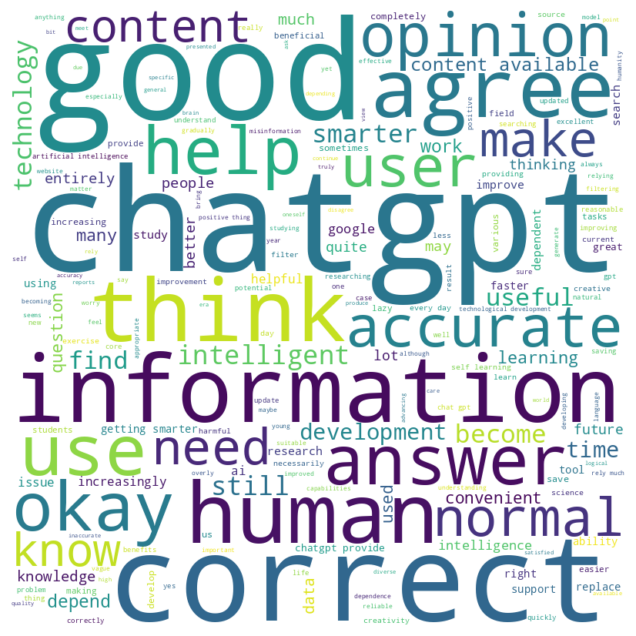

In [ ]:
# Kết hợp tất cả văn bản trong cột 'Cau37' thành một chuỗi
text = ' '.join(data_cleaned_37)

# Tạo WordCloud từ văn bản đã kết hợp
generate_wordcloud(text)

Ảnh wordcloud câu hỏi 37 star

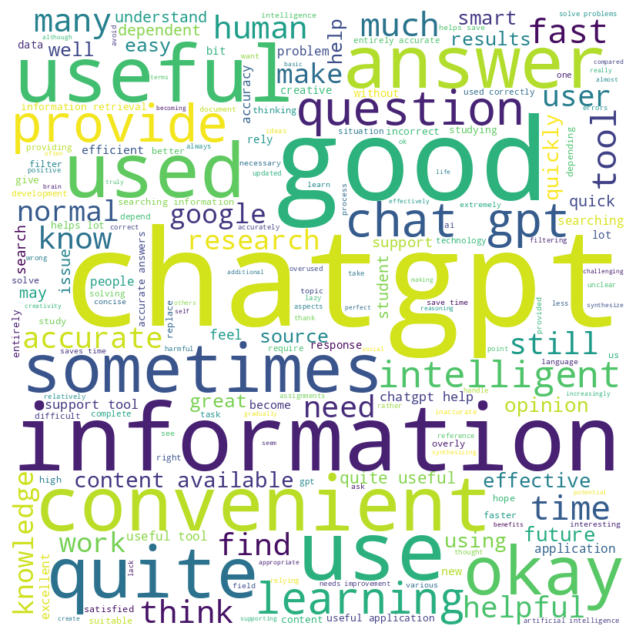

In [ ]:
# Kết hợp tất cả văn bản trong cột 'Cau37' thành một chuỗi
text = ' '.join(data_cleaned_37_star)

# Tạo WordCloud từ văn bản đã kết hợp
generate_wordcloud(text)

# Sử dụng TF-IDF

Từ khóa trích xuất từ mỗi câu:
    Top 1 Term Top 2 Term  Top 3 Term
0      meaning       dumb  understand
1         good      young   exercises
2      opinion      young    exercise
3         good      young   exercises
4         okay      young   exercises
..         ...        ...         ...
815    correct      young    exercise
816   learning       good       young
817   mistakes       chat         gpt
818       also      think       young
819       chat       sure         gpt

[820 rows x 3 columns]


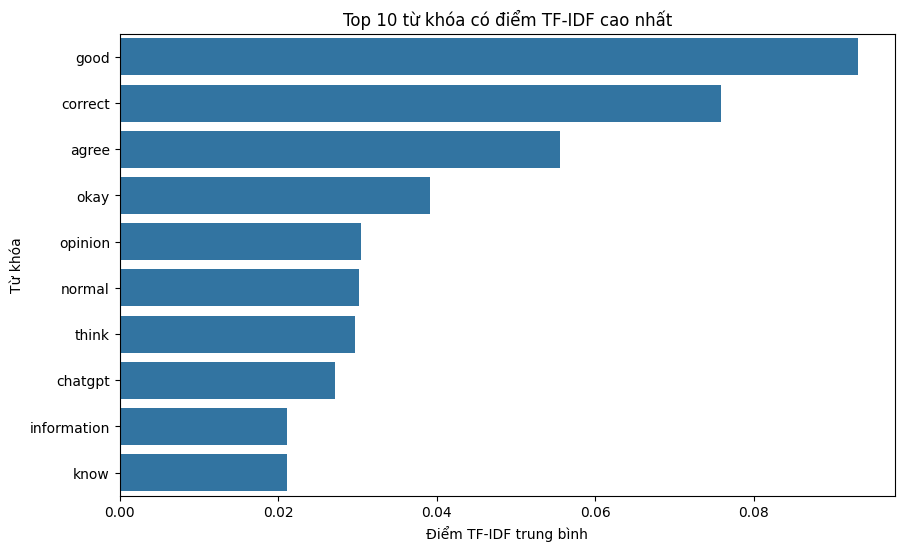

,Top 1 Term,Top 2 Term,Top 3 Term
0,meaning,dumb,understand
1,good,young,exercises
2,opinion,young,exercise
3,good,young,exercises
4,okay,young,exercises
...,...,...,...
815,correct,young,exercise
816,learning,good,young
817,mistakes,chat,gpt
818,also,think,young


In [ ]:

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_and_visualize_keywords(df, top_n=3):
    """
    Trích xuất các từ khóa có điểm TF-IDF cao nhất cho mỗi câu và trực quan hóa TF-IDF của từ khóa.

    Args:
    - df (pd.DataFrame): DataFrame chứa dữ liệu văn bản, với cột 'sentence' chứa các câu.
    - top_n (int): Số lượng từ khóa có điểm TF-IDF cao nhất cần trích xuất từ mỗi câu.

    Returns:
    - top_terms_df (pd.DataFrame): DataFrame chứa các từ khóa trích xuất từ mỗi câu.
    """

    # Khởi tạo TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Chuyển đổi dữ liệu văn bản thành ma trận TF-IDF
    X = vectorizer.fit_transform(df)

    # Lấy các từ khóa (tên các từ trong từ điển của TF-IDF)
    terms = vectorizer.get_feature_names_out()

    # Tính toán điểm TF-IDF của từng từ trong mỗi câu
    tfidf_scores = X.toarray()

    # Lưu trữ các từ có điểm TF-IDF cao nhất trong mỗi câu
    top_terms = []
    for i, row in enumerate(tfidf_scores):
        top_indices = row.argsort()[-top_n:][::-1]  # Lấy các chỉ số của các từ có điểm TF-IDF cao nhất
        top_terms.append([terms[index] for index in top_indices])

    # Chuyển thành DataFrame để dễ dàng vẽ
    top_terms_df = pd.DataFrame(top_terms, columns=[f"Top {i+1} Term" for i in range(top_n)])

    # Hiển thị DataFrame chứa các từ khóa trích xuất
    print("Từ khóa trích xuất từ mỗi câu:")
    print(top_terms_df)

    # Trực quan hóa TF-IDF của các từ trong toàn bộ tập dữ liệu
    # Tính trung bình điểm TF-IDF của mỗi từ trên toàn bộ tập dữ liệu
    avg_tfidf_scores = tfidf_scores.mean(axis=0)

    # Tạo DataFrame với từ và điểm TF-IDF trung bình
    tfidf_df = pd.DataFrame(list(zip(terms, avg_tfidf_scores)), columns=["Term", "Average TF-IDF"])
    tfidf_df = tfidf_df.sort_values(by="Average TF-IDF", ascending=False)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Average TF-IDF", y="Term", data=tfidf_df.head(10))  # Top 10 từ khóa có TF-IDF cao nhất
    plt.title("Top 10 từ khóa có điểm TF-IDF cao nhất")
    plt.xlabel("Điểm TF-IDF trung bình")
    plt.ylabel("Từ khóa")
    plt.show()

    return top_terms_df



# Gọi hàm để trích xuất và trực quan hóa
extract_and_visualize_keywords(df = data_cleaned_37, top_n=3)


Từ khóa trích xuất từ mỗi câu:
      Top 1 Term Top 2 Term Top 3 Term
0      companion     lazier   friendly
1        helpful     yields   features
2      generates     fields      ideas
3           good     yields   features
4           okay     yields      first
..           ...        ...        ...
775       number       slow   answered
776  application     useful     yields
777        helps      cases     deeply
778    satisfied     yields    fearing
779      applied       many       chat

[780 rows x 3 columns]


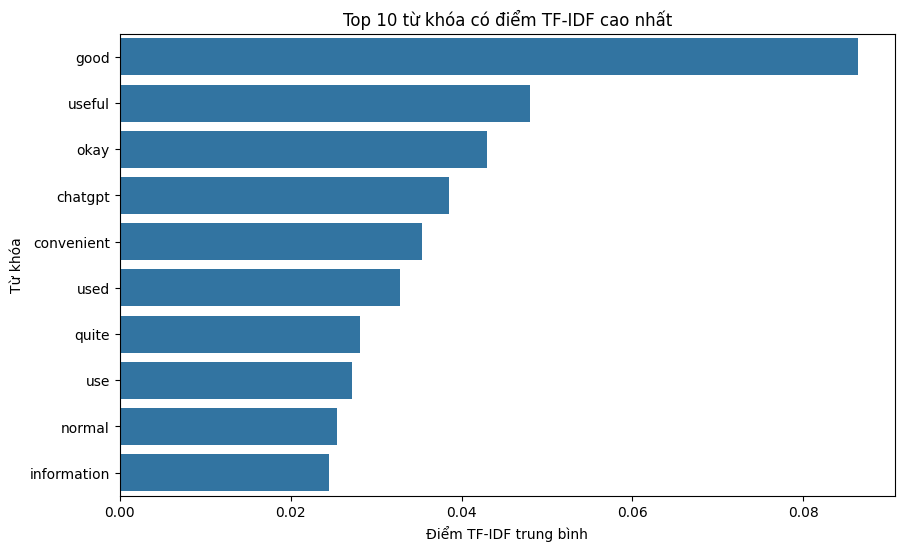

,Top 1 Term,Top 2 Term,Top 3 Term
0,companion,lazier,friendly
1,helpful,yields,features
2,generates,fields,ideas
3,good,yields,features
4,okay,yields,first
...,...,...,...
775,number,slow,answered
776,application,useful,yields
777,helps,cases,deeply
778,satisfied,yields,fearing


In [ ]:
extract_and_visualize_keywords(df = data_cleaned_37_star, top_n=3)

# Rake

In [ ]:
from rake_nltk import Rake
def rake_keyword_extraction(texts):
    """
    Trích xuất từ khóa từ một danh sách các câu sử dụng RAKE.

    Args:
    - texts (list): Danh sách các câu văn bản cần trích xuất từ khóa.

    Returns:
    - keywords_list (list): Danh sách các từ khóa trích xuất từ mỗi câu.
    """

    # Khởi tạo đối tượng Rake
    rake = Rake()

    # Danh sách lưu trữ từ khóa trích xuất
    all_keywords = []

    for text in texts:
        # Trích xuất từ khóa từ mỗi câu
        rake.extract_keywords_from_text(text)

        # Lấy danh sách từ khóa và điểm của chúng
        keywords_with_scores = rake.get_ranked_phrases_with_scores()

        # Thêm các từ khóa vào danh sách chung
        all_keywords.extend(keywords_with_scores)

    return all_keywords


# Trích xuất từ khóa cho từng câu
keywords = rake_keyword_extraction(data_cleaned_37)

# # In kết quả
# for i, kws in enumerate(keywords):
#     print(f"Câu {i+1}:")
#     for score, keyword in kws:
#         print(f"    Điểm {score:.3f}: {keyword}")
#     print()

keywords_df = pd.DataFrame(keywords, columns=["Score", "Keyword"])

# Sắp xếp từ khóa theo điểm số giảm dần
keywords_df_sorted = keywords_df.sort_values(by="Score", ascending=False)

# Hiển thị top 20 từ khóa có điểm số cao nhất
top_20_keywords = keywords_df_sorted.head(20)

# In kết quả
print(top_20_keywords)

      Score                                            Keyword
749  2500.0  opinion chatgpt fundamentally algorithm create...
162  1936.0  study law need think independently lot make as...
318  1681.0  chatgpt breakthrough invention becomes smarter...
699  1369.0  along advancement science humans applied techn...
75   1369.0  agree chatgpt improvement step forward also ch...
14   1024.0  chatgpt produce results surprise users intelli...
461   961.0  however important note models like chatgpt may...
714   729.0  potential humans unlimited future able even gr...
251   729.0  think everything two sides good side artificia...
460   676.0  indeed continuous improvement updates models l...
372   625.0  chatgpt large language model chatbot developed...
246   576.0  really want experience sometimes exercises sol...
134   529.0  think reason celebration computer science adva...
247   484.0  understand chatgpt created uses available big ...
374   441.0  think development chatgpt positive thing p

In [ ]:
keywords = rake_keyword_extraction(data_cleaned_37_star)


keywords_df = pd.DataFrame(keywords, columns=["Score", "Keyword"])

# Sắp xếp từ khóa theo điểm số giảm dần
keywords_df_sorted = keywords_df.sort_values(by="Score", ascending=False)

# Hiển thị top 20 từ khóa có điểm số cao nhất
top_20_keywords = keywords_df_sorted.head(20)

# In kết quả
print(top_20_keywords)

      Score                                            Keyword
583  7396.0  also quite useful work life know filter inform...
457  3844.0  find interesting interact chatgpt see ability ...
582  2916.0  find quite useful powerful fast support tool p...
364  2401.0  chat gpt fantastic tool help solve problems st...
702  1936.0  chatgpt useful know use right purpose usually ...
250  1089.0  chatgpt quite useful students almost anyone lo...
143   900.0  chatgpt tool helps people know gather knowledg...
144   841.0  chat gpt truly effective used correctly right ...
275   784.0  used much seems helpful depending use frequenc...
475   729.0  used chatgpt future surely use chatgpt intelli...
498   676.0  chatgpt good solving problems analyzing thanks...
471   576.0  think chatgpt pretty good support tool perform...
322   576.0  useful tool depending situation still errors d...
590   576.0  chatgpt solves part difficult problems people ...
487   529.0  chat gpt support tool users search informa

# Nhận diện cảm xúc trong câu


In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")
result = sentiment_analyzer("I love this product!")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998855590820312}]


In [ ]:
data_cleaned_37= data_cleaned_37.to_frame(name='sentence')

In [ ]:
data_cleaned_37

In [ ]:
def analyze_sentiment(text):
    # Kiểm tra nếu giá trị là chuỗi và không phải NaN
    if isinstance(text, str):
        return sentiment_analyzer(text)[0]['label']
    else:
        return 'Unknown'  # Hoặc 'Neutral', nếu có giá trị không hợp lệ

# Giả sử bạn có DataFrame df với cột 'sentence'
data_cleaned_37['sentiment'] = data_cleaned_37['sentence'].apply(lambda x: analyze_sentiment(str(x)))

# Hiển thị DataFrame sau khi thêm cột 'sentiment'
print(data_cleaned_37)

                               sentence sentiment
0      dumb understand question meaning  NEGATIVE
1                                  good  POSITIVE
2                               opinion  POSITIVE
3                                  good  POSITIVE
4                                  okay  POSITIVE
..                                  ...       ...
815                             correct  POSITIVE
816                       good learning  POSITIVE
817  agree chat gpt still many mistakes  NEGATIVE
818                          also think  POSITIVE
819        use chat gpt much sure issue  NEGATIVE

[820 rows x 2 columns]


In [ ]:
sentiment_counts = data_cleaned_37['sentiment'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Thêm tiêu đề và nhãn cho trục
plt.title('Phân bố cảm xúc của các câu', fontsize=16)
plt.xlabel('Cảm xúc', fontsize=12)
plt.ylabel('Số lượng câu', fontsize=12)

# Hiển thị biểu đồ
plt.show()

Câu 37 star

In [ ]:
data_cleaned_37_star= data_cleaned_37_star.to_frame(name='sentence')

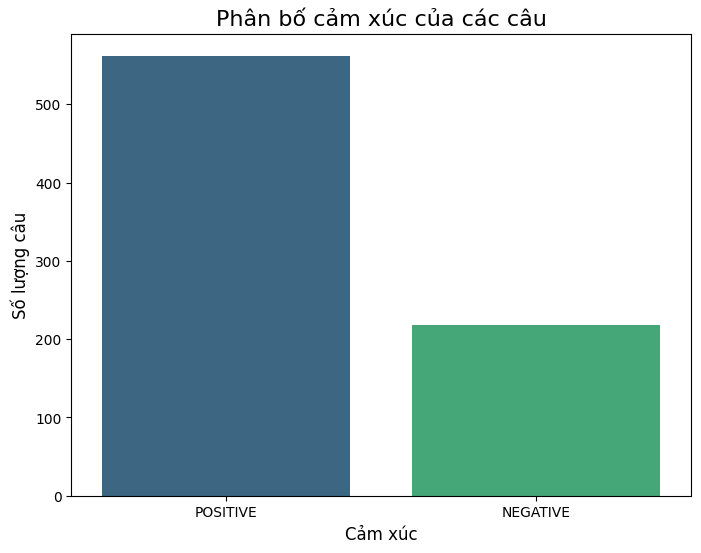

In [ ]:
data_cleaned_37_star['sentiment'] = data_cleaned_37_star['sentence'].apply(lambda x: analyze_sentiment(str(x)))
sentiment_counts = data_cleaned_37_star['sentiment'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Thêm tiêu đề và nhãn cho trục
plt.title('Phân bố cảm xúc của các câu', fontsize=16)
plt.xlabel('Cảm xúc', fontsize=12)
plt.ylabel('Số lượng câu', fontsize=12)

# Hiển thị biểu đồ
plt.show()

# Đánh giá các câu hỏi có độ tương đồng cao

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

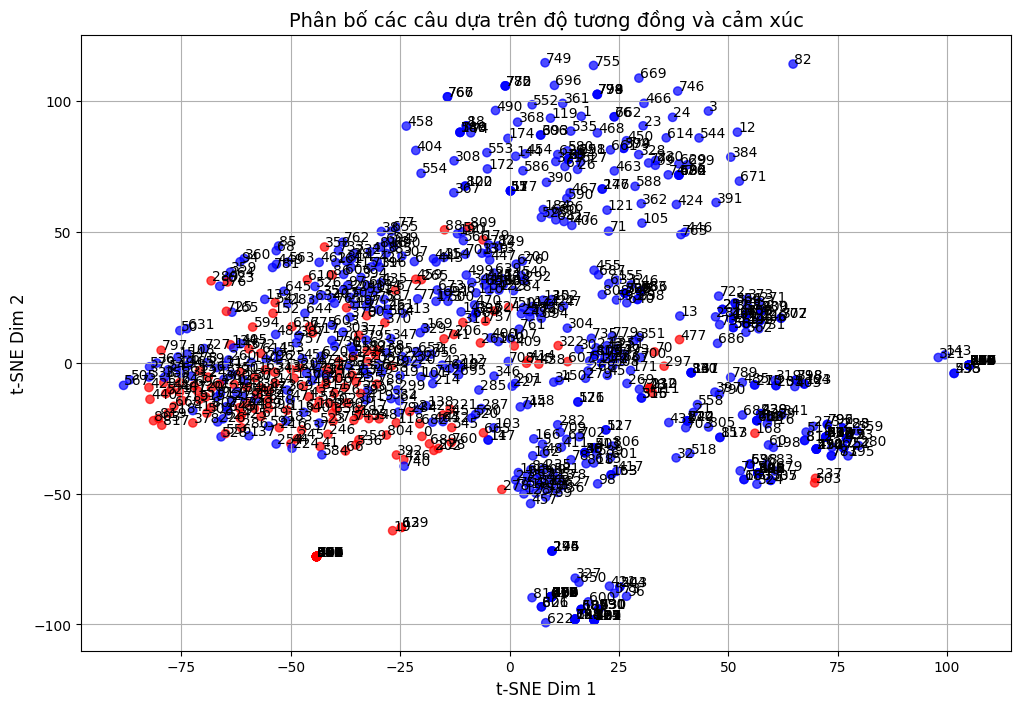

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Tải mô hình Sentence-BERT
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')




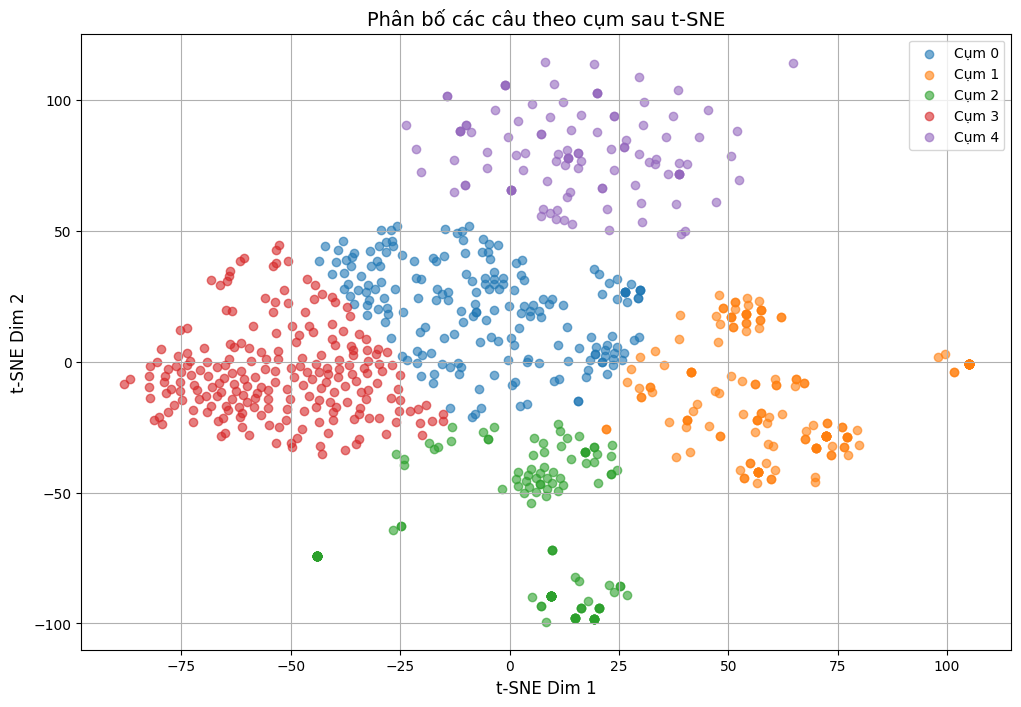

Phân tích chủ đề của các cụm:

--- Chủ đề Cụm 0 ---
Câu tiêu biểu:
- find helpful future projects reports
- good need learn use cleverly extract information thoroughly making work convenient smooth
- like
Từ khóa phổ biến: [('information', 23), ('know', 19), ('useful', 19), ('use', 15), ('convenient', 13), ('good', 11), ('accurate', 11), ('helpful', 10), ('helps', 10), ('used', 10)]

--- Chủ đề Cụm 1 ---
Câu tiêu biểu:
- okay
- find okay
- correct
Từ khóa phổ biến: [('correct', 58), ('okay', 31), ('normal', 24), ('right', 9), ('yes', 8), ('accurate', 6), ('entirely', 5), ('sure', 5), ('find', 3), ('think', 3)]

--- Chủ đề Cụm 2 ---
Câu tiêu biểu:
- opinion
- think helpful
- depends case
Từ khóa phổ biến: [('agree', 48), ('opinion', 25), ('no', 21), ('content', 21), ('available', 21), ('think', 20), ('depends', 5), ('correct', 5), ('vague', 4), ('view', 3)]

--- Chủ đề Cụm 3 ---
Câu tiêu biểu:
- dumb understand question meaning
- makes research solving exercises easier makes human creat

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# 1. Chuyển đổi các câu thành vector embeddings
sentences = data_cleaned_37['sentence'].tolist()
embeddings = model.encode(sentences)

# 2. Giảm chiều với t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Giảm xuống 2D để trực quan hóa
embeddings_2d = tsne.fit_transform(embeddings)

# 3. Phân cụm với KMeans
n_clusters = 5  # Số cụm mong muốn
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

# 4. Thêm nhãn cụm vào DataFrame
data_cleaned_37['cluster'] = clusters

# 5. Vẽ biểu đồ t-SNE với cụm
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_points = embeddings_2d[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cụm {cluster}', alpha=0.6)

plt.title("Phân bố các câu theo cụm sau t-SNE", fontsize=14)
plt.xlabel("t-SNE Dim 1", fontsize=12)
plt.ylabel("t-SNE Dim 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 6. Phân tích chủ đề của từng cụm
print("Phân tích chủ đề của các cụm:")
for cluster in range(n_clusters):
    print(f"\n--- Chủ đề Cụm {cluster} ---")

    # Lấy danh sách câu trong cụm
    cluster_sentences = data_cleaned_37[data_cleaned_37['cluster'] == cluster]['sentence'].tolist()

    # Đếm từ khóa trong cụm
    all_words = [word.lower() for sentence in cluster_sentences for word in word_tokenize(sentence)]
    common_words = Counter(all_words).most_common(10)  # Lấy 10 từ phổ biến nhất

    # Hiển thị câu tiêu biểu và từ khóa
    print(f"Câu tiêu biểu:")
    for sentence in cluster_sentences[:3]:  # Hiển thị 3 câu đầu tiên
        print(f"- {sentence}")

    print(f"Từ khóa phổ biến: {common_words}")


Cụm 0: Ứng dụng thực tế, tiện ích và hỗ trợ công việc.

Cụm 1: Đánh giá trung tính hoặc cơ bản.

Cụm 2: Nhận xét chủ quan, phụ thuộc vào tình huống.

Cụm 3: Phân tích sâu về ChatGPT, ưu/nhược điểm, và tác động.

Cụm 4: Đánh giá tích cực và hài lòng.

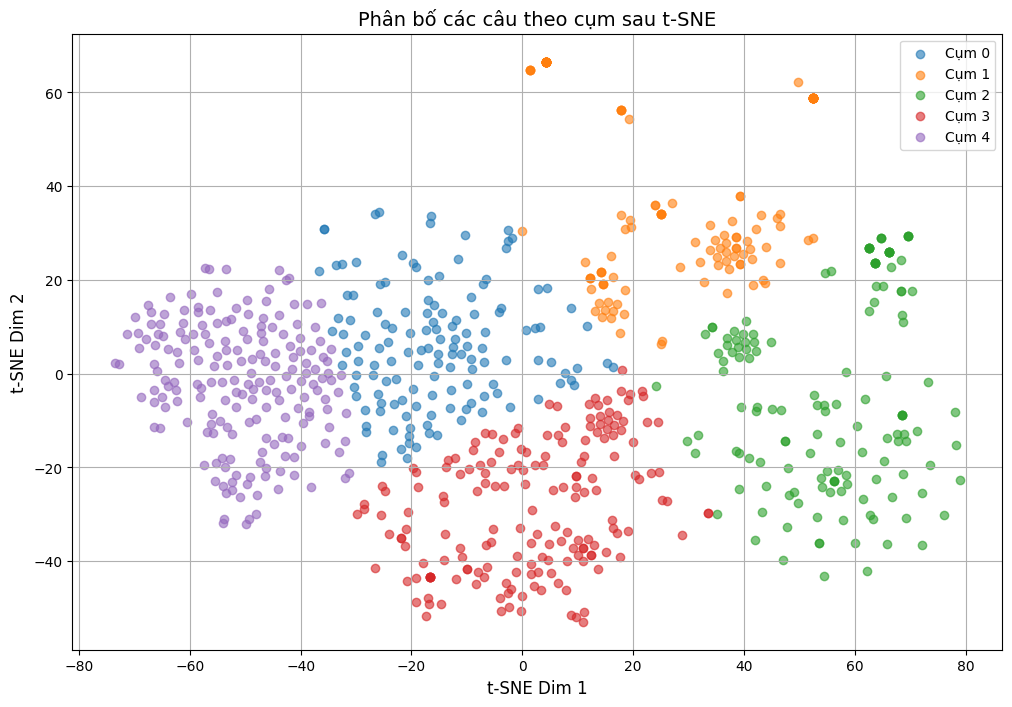

Phân tích chủ đề của các cụm:

--- Chủ đề Cụm 0 ---
Câu tiêu biểu:
- good tool overly relied upon
- provides highly accurate search content
- filter opinions comments discussions scientific topics would better google sometimes lot information hard find accurate information
Từ khóa phổ biến: [('information', 44), ('answers', 22), ('accurate', 21), ('sometimes', 18), ('still', 18), ('tool', 17), ('useful', 14), ('used', 14), ('quite', 12), ('provides', 11)]

--- Chủ đề Cụm 1 ---
Câu tiêu biểu:
- like
- know
- No content available
Từ khóa phổ biến: [('no', 22), ('content', 22), ('available', 22), ('normal', 18), ('used', 16), ('know', 12), ('use', 10), ('much', 4), ('nothing', 4), ('like', 2)]

--- Chủ đề Cụm 2 ---
Câu tiêu biểu:
- good
- okay
- opinion
Từ khóa phổ biến: [('good', 64), ('okay', 34), ('opinion', 17), ('also', 7), ('quite', 5), ('excellent', 5), ('great', 4), ('satisfied', 4), ('ok', 4), ('used', 3)]

--- Chủ đề Cụm 3 ---
Câu tiêu biểu:
- helpful
- think quite useful studyi

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# 1. Chuyển đổi các câu thành vector embeddings
sentences = data_cleaned_37_star['sentence'].tolist()
embeddings = model.encode(sentences)

# 2. Giảm chiều với t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Giảm xuống 2D để trực quan hóa
embeddings_2d = tsne.fit_transform(embeddings)

# 3. Phân cụm với KMeans
n_clusters = 5  # Số cụm mong muốn
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

# 4. Thêm nhãn cụm vào DataFrame
data_cleaned_37_star['cluster'] = clusters

# 5. Vẽ biểu đồ t-SNE với cụm
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_points = embeddings_2d[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cụm {cluster}', alpha=0.6)

plt.title("Phân bố các câu theo cụm sau t-SNE", fontsize=14)
plt.xlabel("t-SNE Dim 1", fontsize=12)
plt.ylabel("t-SNE Dim 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 6. Phân tích chủ đề của từng cụm
print("Phân tích chủ đề của các cụm:")
for cluster in range(n_clusters):
    print(f"\n--- Chủ đề Cụm {cluster} ---")

    # Lấy danh sách câu trong cụm
    cluster_sentences = data_cleaned_37_star[data_cleaned_37_star['cluster'] == cluster]['sentence'].tolist()

    # Đếm từ khóa trong cụm
    all_words = [word.lower() for sentence in cluster_sentences for word in word_tokenize(sentence)]
    common_words = Counter(all_words).most_common(10)  # Lấy 10 từ phổ biến nhất

    # Hiển thị câu tiêu biểu và từ khóa
    print(f"Câu tiêu biểu:")
    for sentence in cluster_sentences[:3]:  # Hiển thị 3 câu đầu tiên
        print(f"- {sentence}")

    print(f"Từ khóa phổ biến: {common_words}")


Cụm 0: Tìm kiếm thông tin chính xác và sử dụng ChatGPT như một công cụ đáng tin cậy.

Cụm 1: Thiếu nội dung hoặc giá trị khi ChatGPT không đáp ứng được kỳ vọng.

Cụm 2: Đánh giá tích cực tổng quát, thể hiện sự hài lòng nhưng ít chi tiết cụ thể.

Cụm 3: Hỗ trợ học tập và tăng hiệu quả trong nghiên cứu và công việc.

Cụm 4: Công nghệ và sự phụ thuộc, vừa là công cụ hữu ích vừa mang lại rủi ro nếu lạm dụng.